In [1]:
!pip install transformers

In [2]:
!pip install datasets

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns

import torch
import torchvision.transforms.functional as fn
from datasets import load_dataset

c:\Users\giria\anaconda3\envs\venv\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\giria\anaconda3\envs\venv\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


### IMPORTING THE TRAIN TEST VALIDATION DATA SPLIT OF THE IMAGECLEF-2019 DATASET

In [11]:
import pandas as pd

train_path = 'train\All_QA_Pairs_train.txt'
validation_path = 'validation\All_QA_Pairs_val.txt'
test_path ='test\VQAMed2019_Test_Questions_w_Ref_Answers.txt'

# Assuming the files have no headers and columns should be set manually
t = pd.read_csv(train_path, sep='|', header=None)
v = pd.read_csv(validation_path, sep='|', header=None)
e = pd.read_csv(test_path, sep='|', header=None)

t.columns = ["img_id", "question", "answer"]
v.columns = ["img_id", "question", "answer"]
e.columns = ["img_id", "category", "question", "answer"]

e.drop(columns=['category'], inplace=True)


In [17]:
train = pd.concat([t,v,e])
train.head(n=10)

,img_id,question,answer
0,synpic41148,what kind of image is this?,cta - ct angiography
1,synpic43984,is this a t1 weighted image?,no
2,synpic38930,what type of imaging modality is used to acqui...,us - ultrasound
3,synpic52143,is this a noncontrast mri?,no
4,synpic20934,what type of image modality is this?,xr - plain film
5,synpic19141,with what modality is this image taken?,xr - plain film
6,synpic25502,what was this image taken with?,xr - plain film
7,synpic38317,is this a contrast or noncontrast ct?,noncontrast
8,synpic22829,was the ct scan taken with contrast?,yes
9,synpic39477,what is the mr weighting in this image?,t2


In [13]:
e.shape

(500, 3)

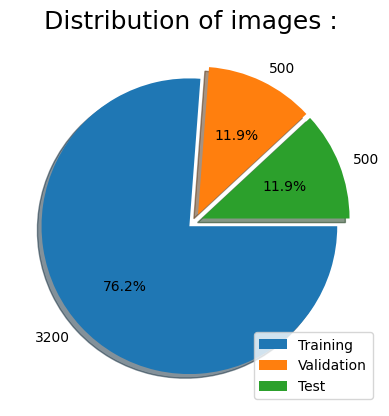

In [36]:
import matplotlib.pyplot as plt
 
values = [3200,500,500]
labels = ['Training', 'Validation', 'Test']
explode = (0.05, 0.05, 0.05)
plt.pie(values, labels= values,explode=explode,counterclock=False, shadow=True, autopct='%1.1f%%')
font1 = {'color':'black','size':18}

plt.title('Distribution of images : ', fontdict = font1)
plt.legend(labels,loc="lower right"
)
plt.show()

In [18]:
train.dtypes

img_id      object
question    object
answer      object
dtype: object

In [20]:
print('Number of unique questions in the dataset :', train['question'].nunique())

Number of unique questions in the dataset : 253


In [21]:
print('Number of unique answers in the dataframe :', train['answer'].nunique())

Number of unique answers in the dataframe : 1749


In [24]:
train.isna().sum() #checking the number of null values in the dataset. 


img_id      0
question    0
answer      0
dtype: int64

In [25]:
answer_space = []
for ans in train.answer.to_list():
    answer_space = answer_space + [ans] #if "," not in ans else answer_space + ans.split(",") 
    
answer_space = list(set(answer_space))
answer_space.sort()
with open(os.path.join('answer_space.txt'), "w") as f:
    f.writelines("\n".join(answer_space)) 

In [26]:

t.to_csv('data_train.csv',index=None)
v.to_csv('data_val.csv',index=None)
e.to_csv('data_test.csv',index=None)

In [28]:

dataset = load_dataset(
    "csv", 
    data_files={
        "training": os.path.join('data_train.csv'),
        "validation": os.path.join('data_val.csv'),
        "test": os.path.join('data_test.csv')

    }
)


with open(os.path.join('answer_space.txt')) as f:
    answer_space = f.read().splitlines()



dataset = dataset.map(
    lambda examples: {
        'label': [
            answer_space.index(ans) for ans in examples['answer']           
        ]
    },
    batched=True
)
dataset

Map:   0%|          | 0/12792 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

DatasetDict({
    training: Dataset({
        features: ['img_id', 'question', 'answer', 'label'],
        num_rows: 12792
    })
    validation: Dataset({
        features: ['img_id', 'question', 'answer', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['img_id', 'question', 'answer', 'label'],
        num_rows: 500
    })
})

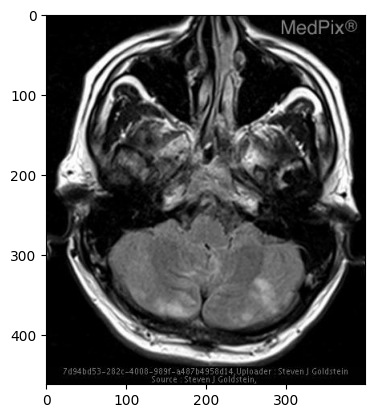

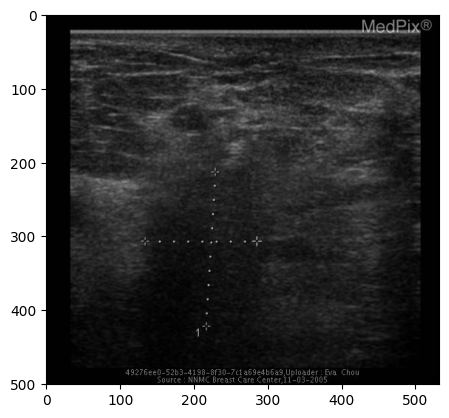

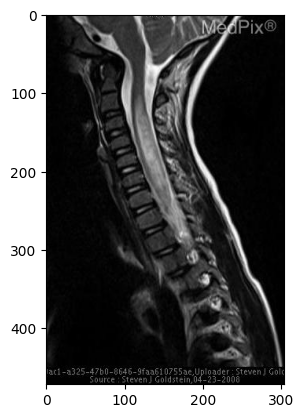

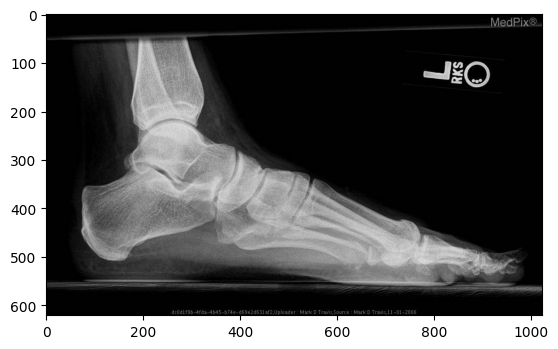

In [31]:
def process(training=True, id=None):
  if training:
    data = dataset["training"]
  else:
    data = dataset["validation"]
  if id == None:
    id = np.random.randint(len(data))
  root_dir = 'train\Train_images'
  image = Image.open(os.path.join( root_dir, data[id]["img_id"] + ".jpg"))
  plt.figure()
  plt.imshow(image)
for id in range(0,4):
  process()

In [32]:
import random
ques=train['question'].values
idx = random.sample(range(0, len(ques)), 20)
for i in (idx):
  print(ques[i])
  print('_'*50)

which organ is captured by this mri?
__________________________________________________
what organ system is evaluated primarily?
__________________________________________________
what imaging modality was used to take this image?
__________________________________________________
what organ system is visualized?
__________________________________________________
what is most alarming about this mri?
__________________________________________________
are there abnormalities in this mammograph?
__________________________________________________
what organ system is imaged?
__________________________________________________
what plane is demonstrated?
__________________________________________________
what organ system is shown in this mri?
__________________________________________________
is this a ct scan?
__________________________________________________
what abnormality is seen in the image?
__________________________________________________
what abnormality is seen in the image?


C:\Users\giria\AppData\Local\Temp\ipykernel_30948\1254043052.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['number of words per question'], kde=False, rug=False)


<Axes: xlabel='number of words per question'>

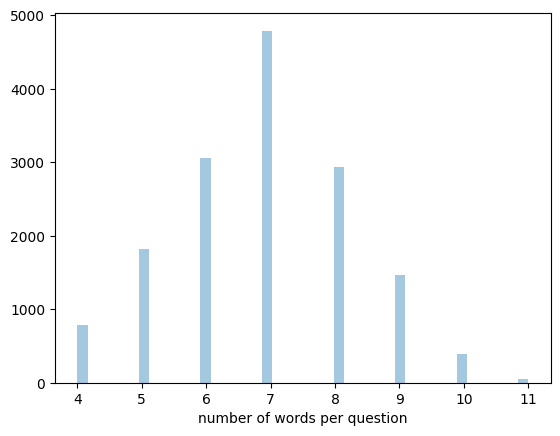

In [33]:
train['number of words per question'] = [len(q.split()) for q in train['question']]
sns.distplot(train['number of words per question'], kde=False, rug=False)


C:\Users\giria\AppData\Local\Temp\ipykernel_30948\4250337913.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['number of words per answer'], kde=False, rug=False)


<Axes: xlabel='number of words per answer'>

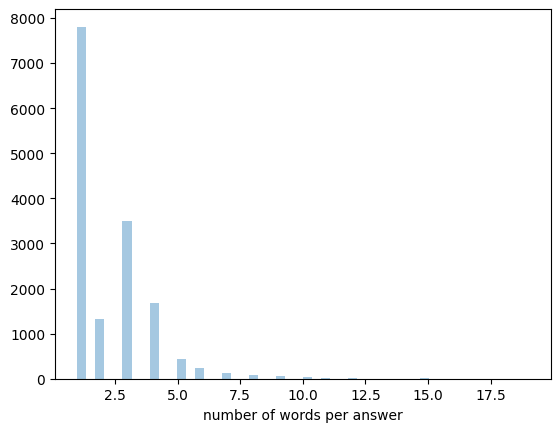

In [34]:
train['number of words per answer'] = [len(a.split()) for a in train['answer']]
sns.distplot(train['number of words per answer'], kde=False, rug=False)


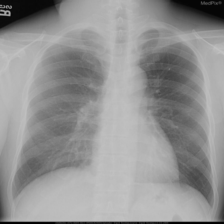

Question: 	how is the image taken?
Response: 	xr - plain film


In [35]:
def showExample(mode, id=None):
  if mode=="training":
    data = dataset["training"]
  elif mode=="validation":
    data = dataset["validation"]
  else:
    data = dataset["test"] 
  if id == None:
    id = np.random.randint(len(data))
  root_dir = 'train\Train_images'
  image = Image.open(os.path.join( root_dir, data[id]["img_id"] + ".jpg"))
  crop = fn.center_crop(image, output_size=[224])
  new_img = fn.resize(image, size=[224,224])
  display(new_img) 
  print('Question: \t' + data[id]['question'])
  print('Response: \t' + data[id]['answer'] )

showExample(mode="training")